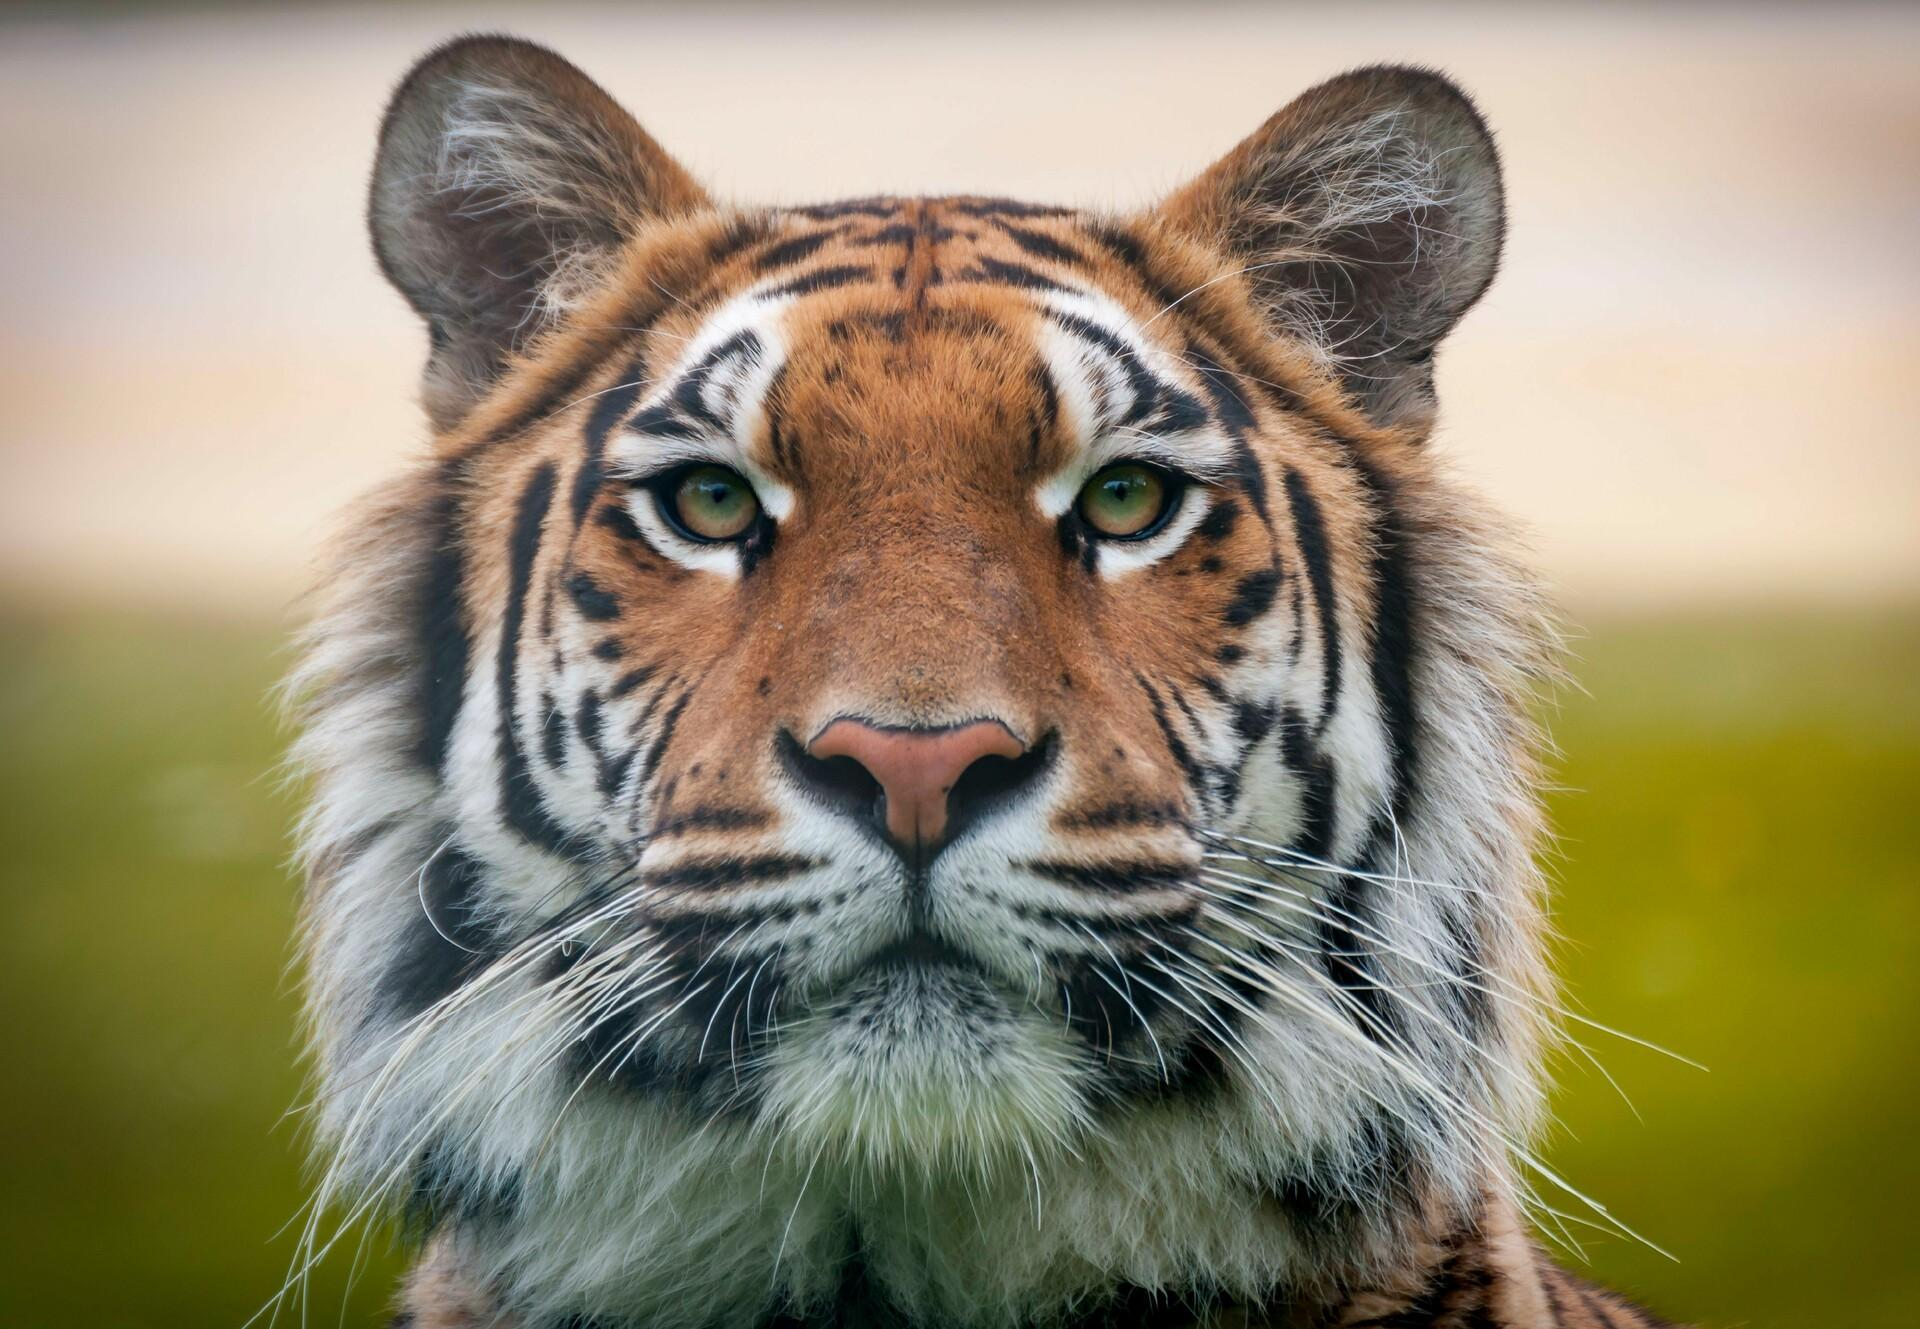

In [1]:
import cv2
from google.colab.patches import cv2_imshow # for image display

input_image = cv2.imread('tiger1.jpg')
cv2_imshow(input_image)

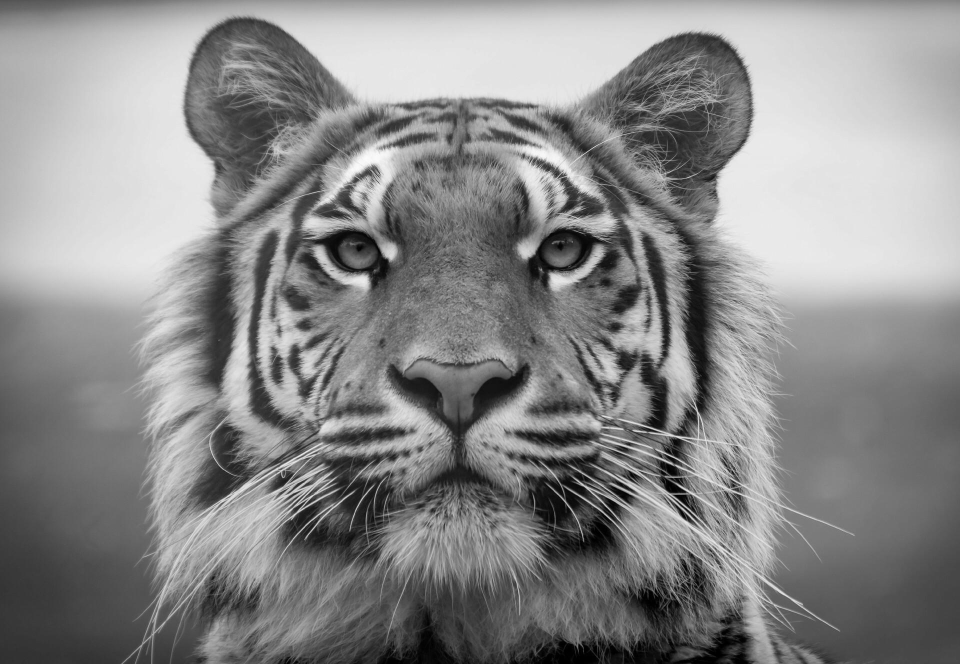

In [3]:
resized_image = cv2.resize(input_image, (0,0), fx=0.5, fy=0.5) 
img = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(im)

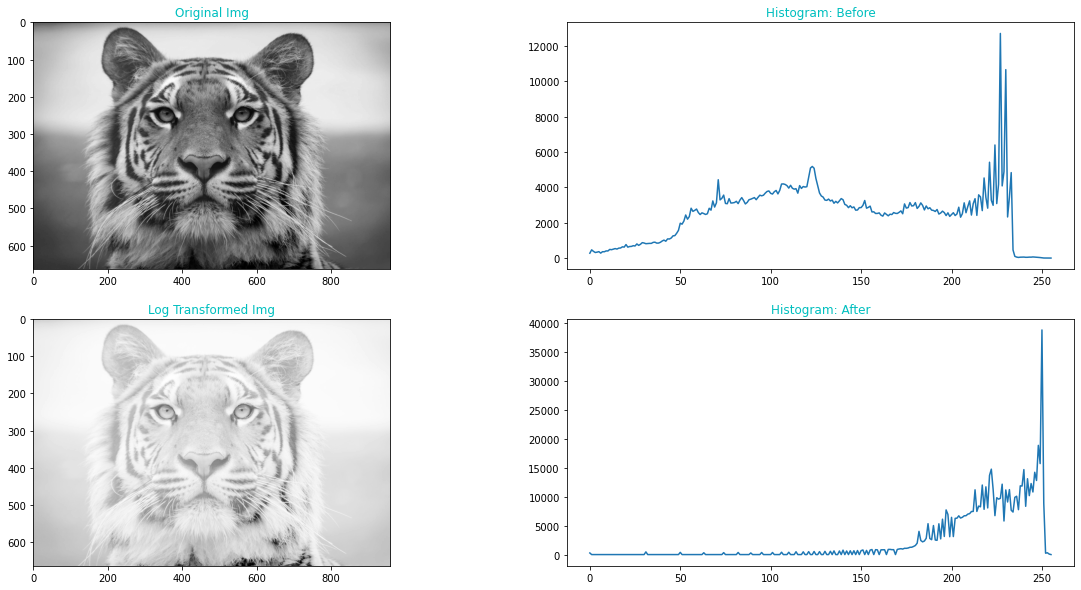

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def applyLogTransform(img):
    hist_img = cv2.calcHist([img],[0],None,[256],[0,256])
    img_log = (np.log(img+1)/(np.log(1+np.max(img))))*255
    img_log = np.array(img_log,dtype=np.uint8)
    hist_img_log = cv2.calcHist([img_log],[0],None,[256],[0,256])

    plt.figure(figsize=(20,10))
    plt.subplot(221),plt.imshow(img,cmap='gray'),plt.title('Original Img',color='c')
    plt.subplot(222),plt.plot(hist_img),plt.title('Histogram: Before',color='c')
    plt.subplot(223),plt.imshow(img_log,cmap='gray'),plt.title('Log Transformed Img',color='c')
    plt.subplot(224),plt.plot(hist_img_log),plt.title('Histogram: After',color='c')
    plt.show()
    return

applyLogTransform(img)

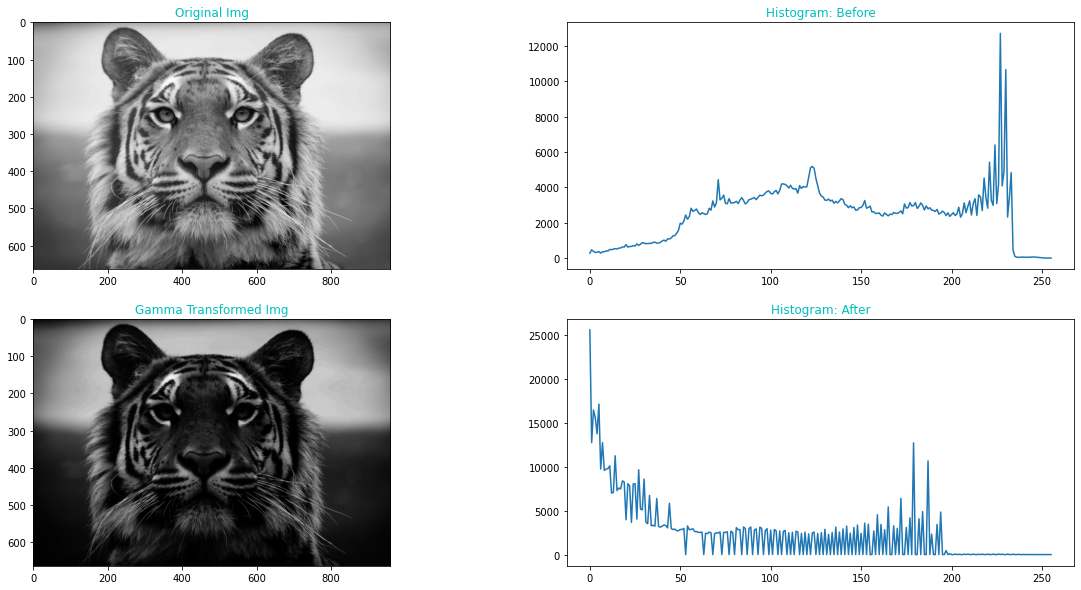

In [10]:
gamma_vals = [0.1, 0.5, 1.2, 2.2]

def applyGammaTransform(img,gamma_val=None):
    hist_img = cv2.calcHist([img],[0],None,[256],[0,256])
    gamma_corrected = np.array(255*(img / 255) ** gamma_val, dtype = 'uint8')
    hist_img_gamma = cv2.calcHist([gamma_corrected],[0],None,[256],[0,256])

    plt.figure(figsize=(20,10))
    plt.subplot(221),plt.imshow(img,cmap='gray'),plt.title('Original Img',color='c')
    plt.subplot(222),plt.plot(hist_img),plt.title('Histogram: Before',color='c')
    plt.subplot(223),plt.imshow(gamma_corrected,cmap='gray'),plt.title('Gamma Transformed Img',color='c')
    plt.subplot(224),plt.plot(hist_img_gamma),plt.title('Histogram: After',color='c')
    plt.show()
    return

applyGammaTransform(img,gamma_val=3.0)

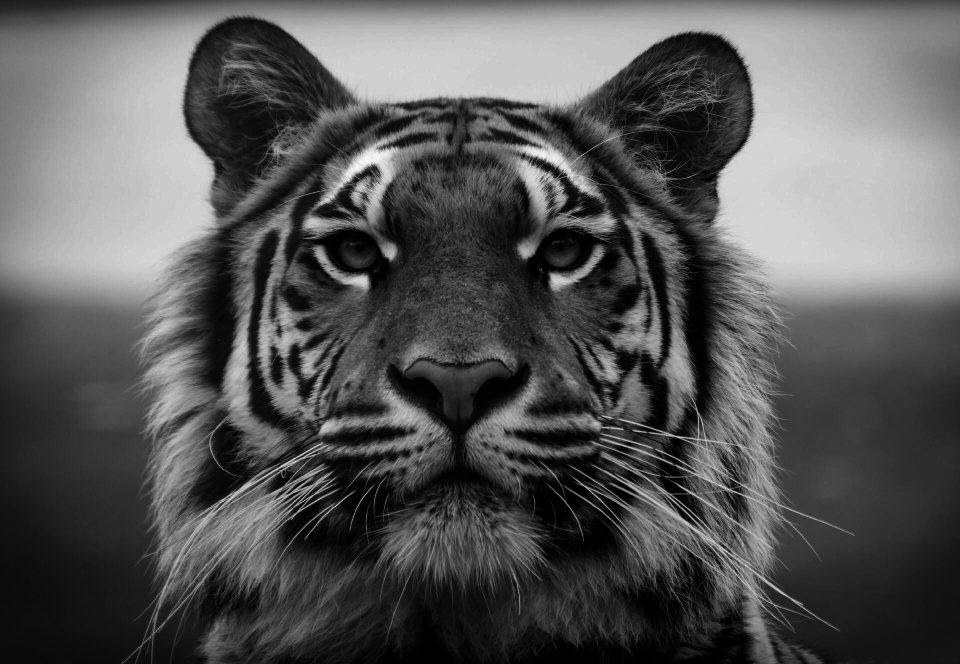

In [17]:
im_gray = 255.0*(img/255.0)**2
cv2_imshow(im_gray)

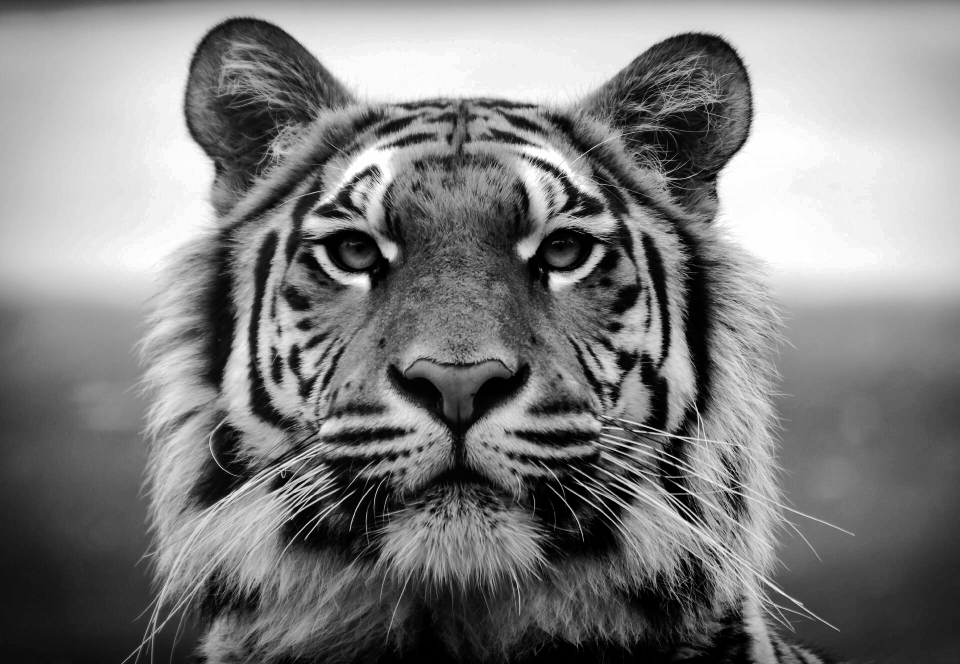

In [18]:
# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
im_result = histeq(im_gray)
cv2_imshow(im_result)

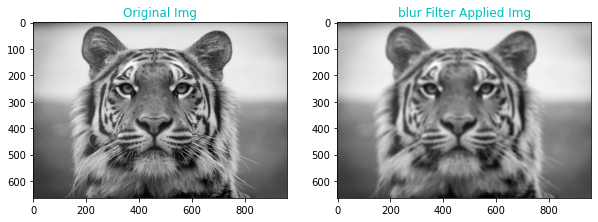

In [21]:
def applyFilter(img,func_filter=None,kernel_len=None):
    if img is None:
        print('Unable to Read Image. Check you gave right path')
        return -1
    if func_filter == 'blur':
        img_fltr = cv2.blur(img,(kernel_len,kernel_len))
    if func_filter ==  'gaussian':
        img_fltr = cv2.GaussianBlur(img,(kernel_len,kernel_len),0)
    if func_filter == 'median':
        #kernal_len should be odd and greater than 1
        img_fltr = cv2.medianBlur(img,kernel_len)
    if func_filter == 'bilateral':
        img_fltr = cv2.bilateralFilter(img,kernel_len,kernel_len*2,kernel_len*2)
    if func_filter == 'arbitary':
        img_fltr =  cv2.filter2D(img,-1,kernel_len)

    plt.figure(figsize=(10,10))
    plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original Img',color='c')
    plt.subplot(122),plt.imshow(img_fltr,cmap='gray'),plt.title((func_filter+' Filter Applied Img'),color='c')
    return 

applyFilter(img,func_filter='blur',kernel_len=10)